In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## sci-kit learn ridge regression genomic prediction

In [29]:
sim1 = pd.read_csv('rrBLUP_output/test_sim_WF_1kbt_10000n_5000000bp_scklrr_pheno_pred.txt', sep=",")
sim2 = pd.read_csv('rrBLUP_output/test_sim_WF_10kbt_10000n_5000000bp_scklrr_pheno_pred.txt', sep=",")
sim3 = pd.read_csv('rrBLUP_output/test_sim_WF_null_10000n_5000000bp_scklrr_pheno_pred.txt', sep=",")

In [30]:
sim1['scenario'] = '1kb_bottleneck'
sim1['trait_architecture'] = ((sim1['trait'] - 1) // 5) + 1
sim1['replicate'] = ((sim1['trait'] - 1) % 5) + 1

sim2['scenario'] = '10kb_bottleneck'
sim2['trait_architecture'] = ((sim2['trait'] - 1) // 5) + 1
sim2['replicate'] = ((sim2['trait'] - 1) % 5) + 1

sim3['scenario'] = 'Wright_Fisher_null'
sim3['trait_architecture'] = ((sim3['trait'] - 1) // 5) + 1
sim3['replicate'] = ((sim3['trait'] - 1) % 5) + 1

#sim1

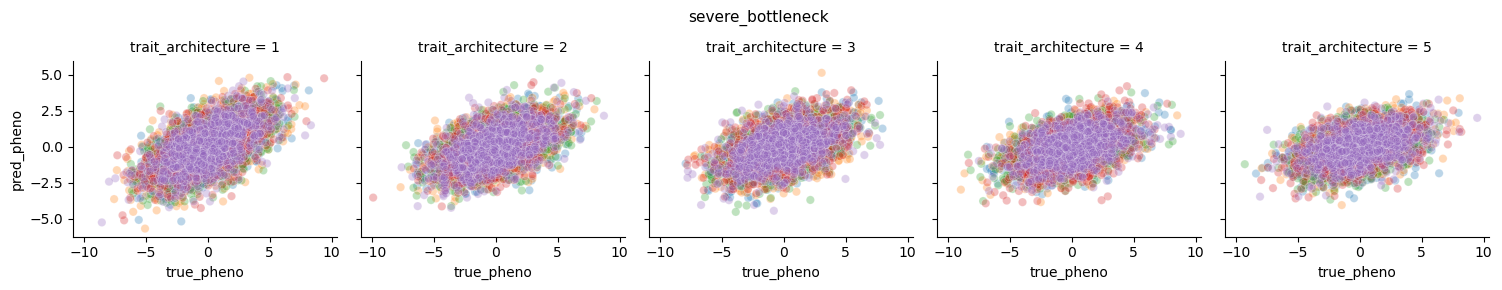

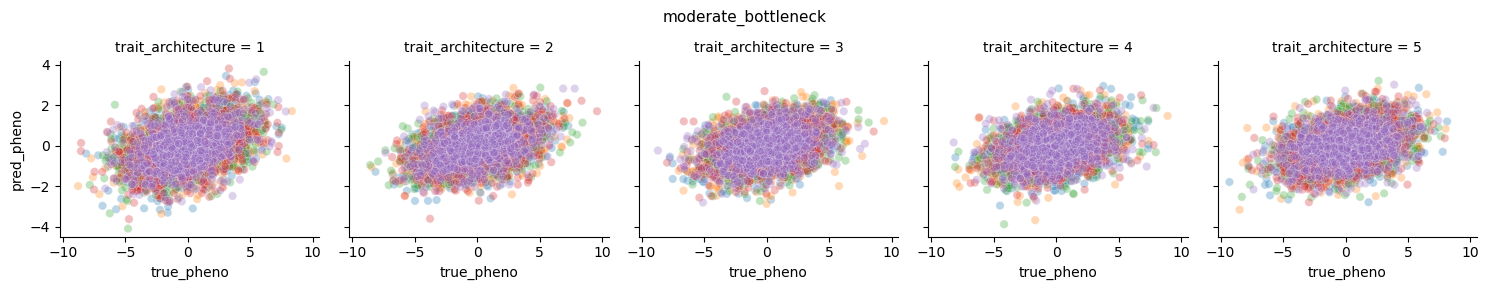

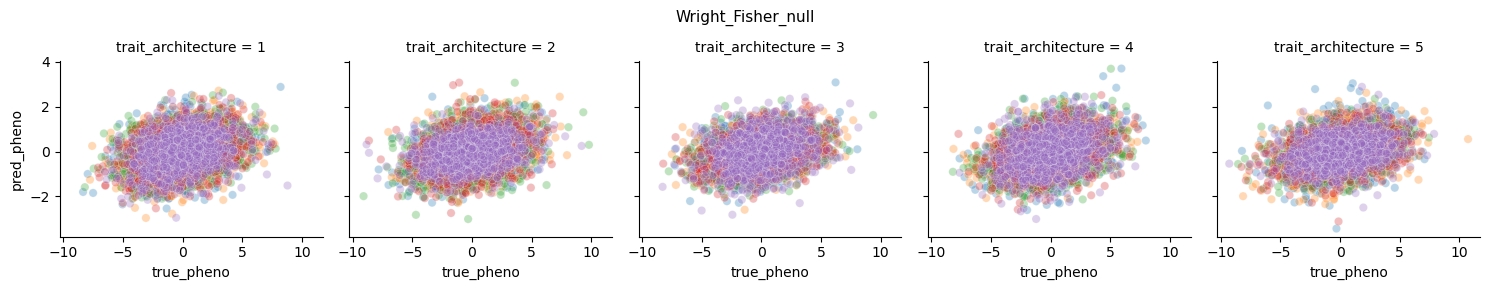

In [31]:
g1 = sns.FacetGrid(sim1, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g1.fig.suptitle("severe_bottleneck", fontsize=11, y=0.95)
g1.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)

g2 = sns.FacetGrid(sim2, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g2.fig.suptitle("moderate_bottleneck", fontsize=11, y=0.95)
g2.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)

g3 = sns.FacetGrid(sim3, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g3.fig.suptitle("Wright_Fisher_null", fontsize=11, y=0.95)
g3.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)


In [32]:
summary1 = pd.read_csv('rrBLUP_output/test_sim_WF_1kbt_10000n_5000000bp_scklrr_corr_summary.txt', sep=",")
summary2 = pd.read_csv('rrBLUP_output/test_sim_WF_10kbt_10000n_5000000bp_scklrr_corr_summary.txt', sep=",")
summary3 = pd.read_csv('rrBLUP_output/test_sim_WF_null_10000n_5000000bp_scklrr_corr_summary.txt', sep=",")

In [33]:
summary1['sim_scenario'] = 'severe_bottleneck'
summary2['sim_scenario'] = 'moderate_bottleneck'
summary3['sim_scenario'] = 'WF_null'

summary = pd.concat([summary1, summary2,  summary3])

summary['trait_architecture'] = ((summary['trait'] - 1) // 5) + 1
summary

,trait,pearson_corr_pheno,pearson_corr_beta,best_lambda,sim_scenario,trait_architecture
0,1,0.615770,0.141106,15264.179672,severe_bottleneck,1
1,2,0.588327,0.143322,15264.179672,severe_bottleneck,1
2,3,0.607109,0.142140,15264.179672,severe_bottleneck,1
3,4,0.611950,0.142497,15264.179672,severe_bottleneck,1
4,5,0.612026,0.142465,15264.179672,severe_bottleneck,1
...,...,...,...,...,...,...
20,21,0.281136,0.057638,4941.713361,WF_null,5
21,22,0.328668,0.055549,4941.713361,WF_null,5
22,23,0.299345,0.053213,7196.856730,WF_null,5
23,24,0.303134,0.047823,7196.856730,WF_null,5


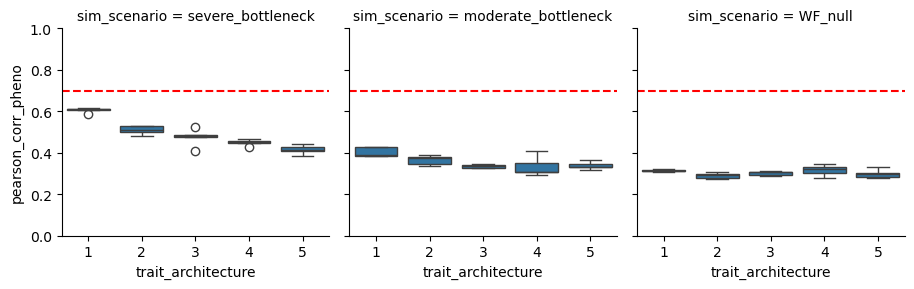

In [34]:
gsum = sns.FacetGrid(summary, col="sim_scenario", col_wrap=5, sharex=True, sharey=True)
gsum.map_dataframe(sns.boxplot, x="trait_architecture", y="pearson_corr_pheno")
gsum.set(ylim=(0, 1))
gsum.map(plt.axhline, y=0.7, color='red', linestyle='--')


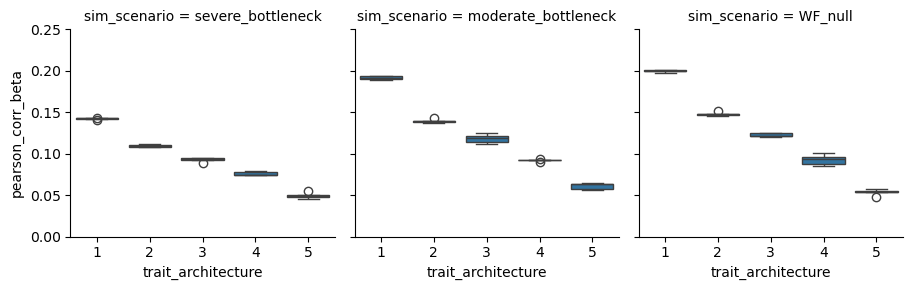

In [35]:
gsum = sns.FacetGrid(summary, col="sim_scenario", col_wrap=5, sharex=True, sharey=True)
gsum.map_dataframe(sns.boxplot, x="trait_architecture", y="pearson_corr_beta")
gsum.set(ylim=(0, 0.25))

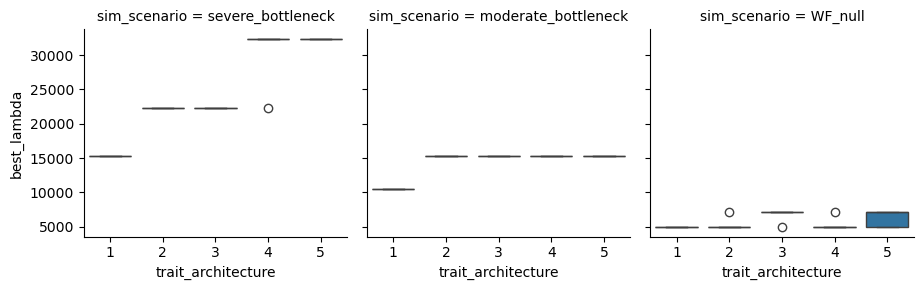

In [36]:
gsum = sns.FacetGrid(summary, col="sim_scenario", col_wrap=5, sharex=True, sharey=True)
gsum.map_dataframe(sns.boxplot, x="trait_architecture", y="best_lambda")

## rrBLUP ridge regression genomic prediction

In [37]:
sim1_BLUP = pd.read_csv('rrBLUP_output/test_sim_WF_1kbt_10000n_5000000bp_rrBLUP_pheno_pred.txt', sep=" ")
sim2_BLUP = pd.read_csv('rrBLUP_output/test_sim_WF_10kbt_10000n_5000000bp_rrBLUP_pheno_pred.txt', sep=" ")
sim3_BLUP = pd.read_csv('rrBLUP_output/test_sim_WF_null_10000n_5000000bp_rrBLUP_pheno_pred.txt', sep=" ")

In [38]:
sim1_BLUP['scenario'] = '1kb_bottleneck'
sim1_BLUP['trait_architecture'] = ((sim1_BLUP['trait'] - 1) // 5) + 1
sim1_BLUP['replicate'] = ((sim1_BLUP['trait'] - 1) % 5) + 1

sim2_BLUP['scenario'] = '10kb_bottleneck'
sim2_BLUP['trait_architecture'] = ((sim2_BLUP['trait'] - 1) // 5) + 1
sim2_BLUP['replicate'] = ((sim2_BLUP['trait'] - 1) % 5) + 1

sim3_BLUP['scenario'] = 'Wright_Fisher_null'
sim3_BLUP['trait_architecture'] = ((sim3_BLUP['trait'] - 1) // 5) + 1
sim3_BLUP['replicate'] = ((sim3_BLUP['trait'] - 1) % 5) + 1

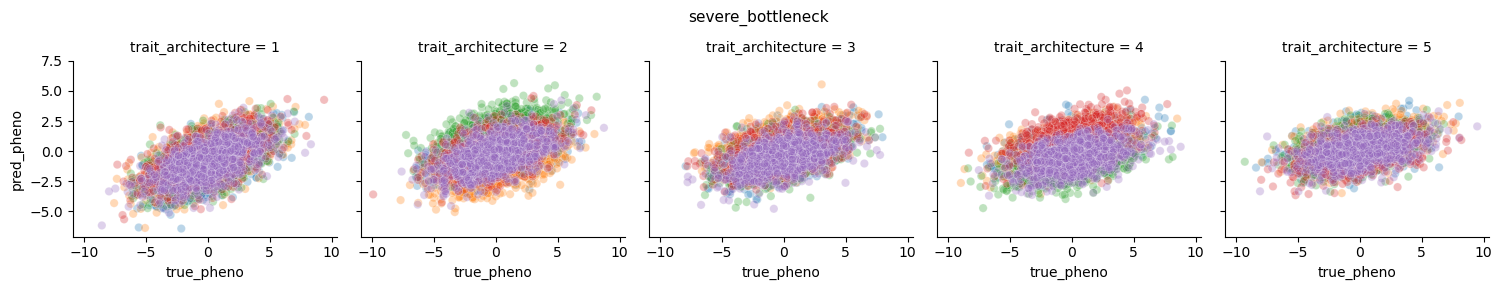

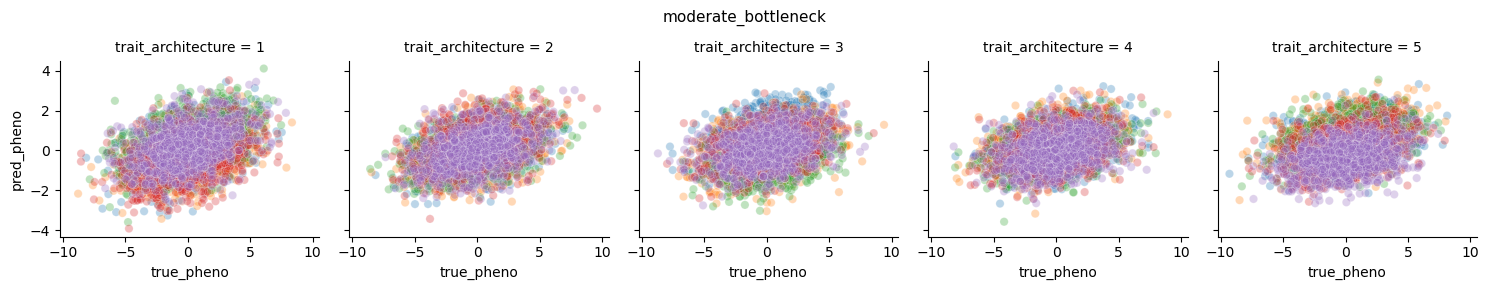

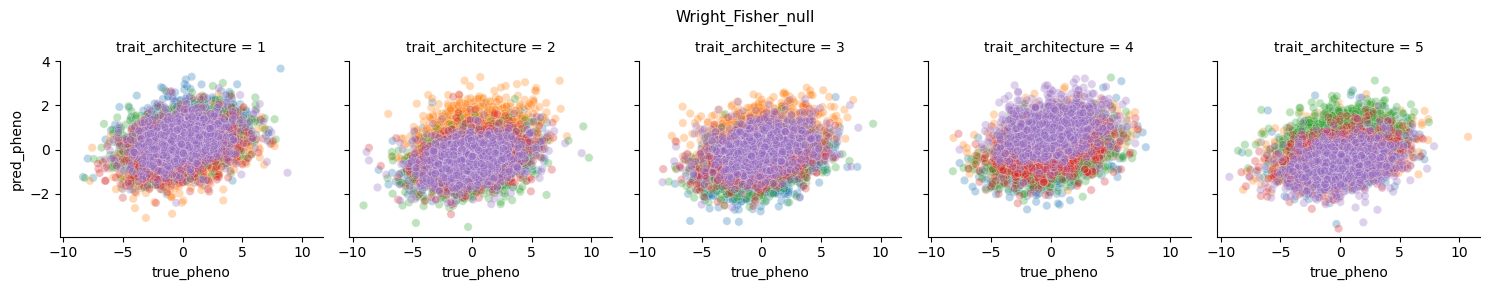

In [39]:
g1 = sns.FacetGrid(sim1_BLUP, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g1.fig.suptitle("severe_bottleneck", fontsize=11, y=0.95)
g1.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)

g2 = sns.FacetGrid(sim2_BLUP, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g2.fig.suptitle("moderate_bottleneck", fontsize=11, y=0.95)
g2.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)

g3 = sns.FacetGrid(sim3_BLUP, col="trait_architecture", col_wrap=5, sharex=True, sharey=True)
g3.fig.suptitle("Wright_Fisher_null", fontsize=11, y=0.95)
g3.map_dataframe(sns.scatterplot, x="true_pheno", y="pred_pheno", hue="replicate", palette="tab10", alpha=0.3)

In [40]:
summary1_rrBLUP = pd.read_csv('rrBLUP_output/test_sim_WF_1kbt_10000n_5000000bp_rrBLUP_corr_summary.txt', sep=" ")
summary2_rrBLUP = pd.read_csv('rrBLUP_output/test_sim_WF_10kbt_10000n_5000000bp_rrBLUP_corr_summary.txt', sep=" ")
summary3_rrBLUP = pd.read_csv('rrBLUP_output/test_sim_WF_null_10000n_5000000bp_rrBLUP_corr_summary.txt', sep=" ")

In [41]:
summary1_rrBLUP['sim_scenario'] = 'severe_bottleneck'
summary2_rrBLUP['sim_scenario'] = 'moderate_bottleneck'
summary3_rrBLUP['sim_scenario'] = 'WF_null'

#summary_rrBLUP = pd.concat([summary1_rrBLUP,  summary3_rrBLUP])
summary_rrBLUP = pd.concat([summary1_rrBLUP, summary2_rrBLUP, summary3_rrBLUP])

summary_rrBLUP['trait_architecture'] = ((summary_rrBLUP['trait'] - 1) // 5) + 1
summary_rrBLUP.head()

,trait,pred_accuracy,add_eff_cor,lambda,sim_scenario,trait_architecture
0,1,0.615106,0.141114,54964.699745,severe_bottleneck,1
1,2,0.588358,0.143314,59344.198109,severe_bottleneck,1
2,3,0.607131,0.142106,59000.622992,severe_bottleneck,1
3,4,0.611735,0.142517,59013.789384,severe_bottleneck,1
4,5,0.612035,0.142462,61422.236486,severe_bottleneck,1


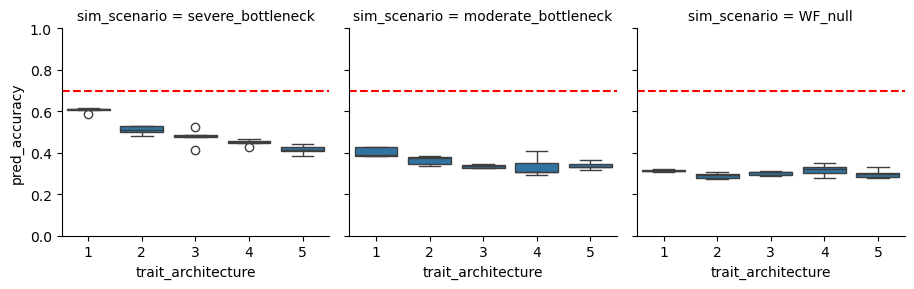

In [42]:
gsum = sns.FacetGrid(summary_rrBLUP, col="sim_scenario", col_wrap=5, sharex=True, sharey=True)
gsum.map_dataframe(sns.boxplot, x="trait_architecture", y="pred_accuracy")
gsum.set(ylim=(0, 1))
gsum.map(plt.axhline, y=0.7, color='red', linestyle='--')

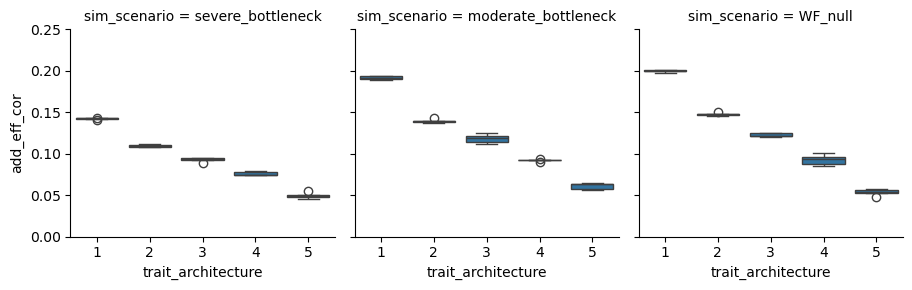

In [43]:
gsum = sns.FacetGrid(summary_rrBLUP, col="sim_scenario", col_wrap=5, sharex=True, sharey=True)
gsum.map_dataframe(sns.boxplot, x="trait_architecture", y="add_eff_cor")
gsum.set(ylim=(0, 0.25))

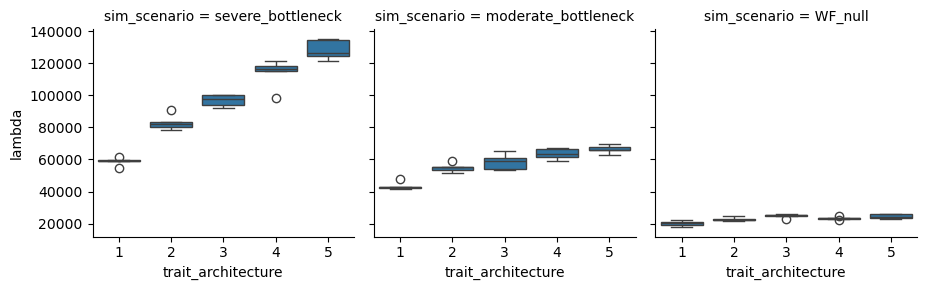

In [44]:
gsum = sns.FacetGrid(summary_rrBLUP, col="sim_scenario", col_wrap=5, sharex=True, sharey=True)
gsum.map_dataframe(sns.boxplot, x="trait_architecture", y="lambda")

## Comparing sci-kit learn and rrBLUP

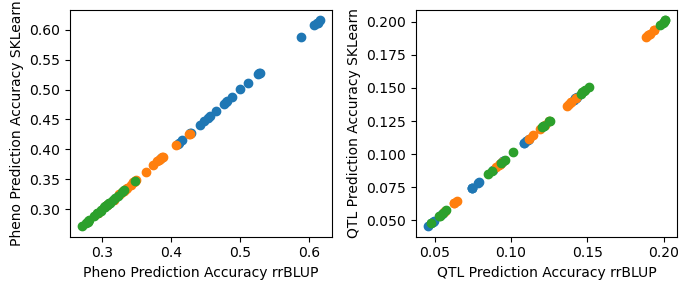

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))  # (rows, columns), set figure size

axes[0].scatter(summary1_rrBLUP['pred_accuracy'], summary1['pearson_corr_pheno'], label='Summary1')
axes[0].scatter(summary2_rrBLUP['pred_accuracy'], summary2['pearson_corr_pheno'], label='Summary2')
axes[0].scatter(summary3_rrBLUP['pred_accuracy'], summary3['pearson_corr_pheno'], label='Summary3')
axes[0].set_xlabel("Pheno Prediction Accuracy rrBLUP")
axes[0].set_ylabel("Pheno Prediction Accuracy SKLearn")


axes[1].scatter(summary1_rrBLUP['add_eff_cor'], summary1['pearson_corr_beta'], label='Summary1')
axes[1].scatter(summary2_rrBLUP['add_eff_cor'], summary2['pearson_corr_beta'], label='Summary2')
axes[1].scatter(summary3_rrBLUP['add_eff_cor'], summary3['pearson_corr_beta'], label='Summary3')
axes[1].set_xlabel("QTL Prediction Accuracy rrBLUP")
axes[1].set_ylabel("QTL Prediction Accuracy SKLearn")


# Adjust layout
plt.tight_layout()
plt.show()


In [69]:
trait_arch_sim1 = pd.read_csv('alphasimr_output/test_sim_WF_1kbt_10000n_5000000bp_trait_architecture.txt', sep=" ")
trait_arch_sim2 = pd.read_csv('alphasimr_output/test_sim_WF_10kbt_10000n_5000000bp_trait_architecture.txt', sep=" ")
trait_arch_sim3 = pd.read_csv('alphasimr_output/test_sim_WF_null_10000n_5000000bp_trait_architecture.txt', sep=" ")


## Regressing prediction accuracy on realized narrow sense heritability

0.986877210701182


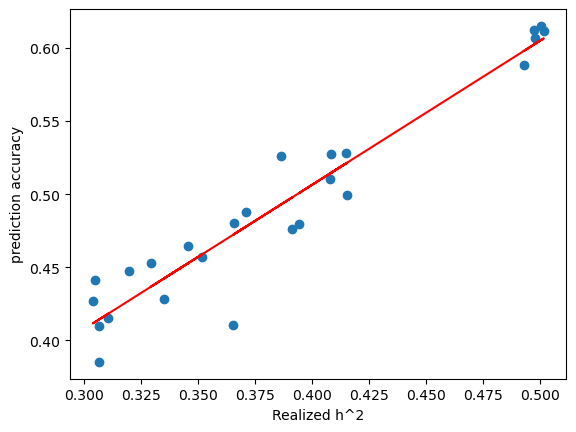

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

h2 = np.array(trait_arch_sim1['h2']).reshape(-1,1)
pred_accuracy = np.array(summary1_rrBLUP['pred_accuracy'])



model.fit(h2, pred_accuracy)
y_pred = model.predict(h2)

plt.scatter(trait_arch_sim1['h2'], summary1_rrBLUP['pred_accuracy'])
plt.plot(h2, y_pred, color='red', label="Regression Line")
plt.xlabel("Realized h^2")
plt.ylabel("prediction accuracy")

print(model.coef_[0])